For this report I will be using 'Students Performance in Exams' dataset from Kaggle available from: https://www.kaggle.com/spscientist/students-performance-in-exams

This dataset is most probably fictional and was created for educational purpose. It consits of Marks secured by the students in high school Students from the United States.


In [100]:
#importing libraries
import pandas as pd
print("Pandas imported successfully, version: "+pd.__version__)
import scipy as sm
from scipy.stats import *
print("SciPy imported successfully, version: "+sm.__version__)
import seaborn as sns
print("Seaborn imported successfully, version: "+sns.__version__)
sns.set(style="whitegrid")
import plotly
print("Plotly imported successfully, version: "+plotly.__version__)
from sklearn.decomposition import PCA #For performing principle component analysis
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)

Pandas imported successfully, version: 0.25.1
SciPy imported successfully, version: 1.3.1
Seaborn imported successfully, version: 0.9.0
Plotly imported successfully, version: 4.3.0


In [101]:
#importing dataset
df = pd.read_csv(r"C:\Users\faust\Documents\Dokumentai\Faustas\Programavimas\Git\SynBio\SynBio\StudentsPerformance.csv")

In [102]:
#looking at the data
print(df.head(5))
print()
count_row = df.shape[0]
count_col = df.shape[1]
print("This dataset contains ", count_row, " entries and ", count_col, " properties for each entry: ", list(df.columns))


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

This dataset contains  1000  entries and  8  properties for each entry:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation c

In this dataset I'd like to analyse how gender, race, lunch type and parental level of education affects students' test results. I have no interest in analysing other possible dependancies.

In [103]:
#checking for missing data
B = df.isnull().sum()
print(B)
print()
print(" There is no missing data on this dataset")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 There is no missing data on this dataset


In [104]:
#gender preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["gender"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1,
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student gender distribution histogram', # title of plot
    xaxis_title_text='Gender', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()

males = df["gender"] == "male"
count_males = df[males].shape[0]
females = df["gender"] == "female"
count_females = df[females].shape[0]

print("Of ", count_row, " students there are ", count_males, " male students and ", count_females, " female students.")

Of  1000  students there are  482  male students and  518  female students.


In [105]:
#Race preview
df= df.sort_values(by ='race/ethnicity' )
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["race/ethnicity"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.2
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student race distribution histogram', # title of plot
    xaxis_title_text='Ethnicity', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
A= df['race/ethnicity'].nunique()
B=df['race/ethnicity'].unique()
print("There are ", A, " different ethnical groups: ", B)

There are  5  different ethnical groups:  ['group A' 'group B' 'group C' 'group D' 'group E']


In [106]:
#Parental level of education preview
A= df['parental level of education'].nunique()
B=df['parental level of education'].unique()

print("There are ", A, " different levels of education: ", B)
print("The correct descending order is: masters, bachelors, associate, some college, high school and some high school. For simplicity I will change values of levels of education from 1 to 6, 1 standing for 'some high school' and 6 for 'masters'")


df['parental level of education'].replace(['some high school'], value ='1', inplace=True)
df['parental level of education'].replace(['high school'], value ='2', inplace=True)
df['parental level of education'].replace(['some college'], value ='3', inplace=True)
df['parental level of education'].replace(["associate's degree"], value ='4', inplace=True)
df['parental level of education'].replace(["bachelor's degree"], value ='5', inplace=True)
df['parental level of education'].replace(["master's degree"], value ='6', inplace=True)




fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["parental level of education"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.5


        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Parental level of education distribution histogram', # title of plot
    xaxis_title_text='Level of education', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()

There are  6  different levels of education:  ['some college' 'some high school' "associate's degree" 'high school'
 "bachelor's degree" "master's degree"]
The correct descending order is: masters, bachelors, associate, some college, high school and some high school. For simplicity I will change values of levels of education from 1 to 6, 1 standing for 'some high school' and 6 for 'masters'


In [107]:
#Lunch preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["lunch"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student lunch distribution histogram', # title of plot
    xaxis_title_text='Lunch type', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
standard = df["lunch"] == "standard"
count_standard = df[standard].shape[0]
free_reduced = df["lunch"] == "free/reduced"
count_free_reduced= df[free_reduced].shape[0]

print(count_standard/count_row*100, "% students eat standard lunch and",count_free_reduced/count_row*100,  "% students eat free/reduced lunch in high schools.")

64.5 % students eat standard lunch and 35.5 % students eat free/reduced lunch in high schools.


In [108]:
#test preparation preview

import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=df["test preparation course"],
    name='Students', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        size=0.1
        
    ),
    marker_color='#EB89B6',
    opacity=0.75
))


fig.update_layout(
    title_text='Student test preparation distribution histogram', # title of plot
    xaxis_title_text='Test preparation course', # xaxis label
    yaxis_title_text='Count', # yaxis label
    showlegend=True
   
    
)

fig.show()
compl = df["test preparation course"] == "completed"
count_compl = df[compl].shape[0]
none = df["test preparation course"] == "none"
count_none= df[none].shape[0]

print(count_compl/count_row*100, "% students completed test preparation course and",count_none/count_row*100,  "% students did not.")

35.8 % students completed test preparation course and 64.2 % students did not.


Test results described:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Test results of male students:
       math score  reading score  writing score
count  482.000000     482.000000     482.000000
mean    68.728216      65.473029      63.311203
std     14.356277      13.931832      14.113832
min     27.000000      23.000000      15.000000
25%     59.000000      56.000000      53.000000
50%     69.000000      66.000000      64.000000
75%     79.000000      75.000000      73.750000
max    100.000000     100.000000     100.000000

Test results of female students:
       math score  reading score  writing scor

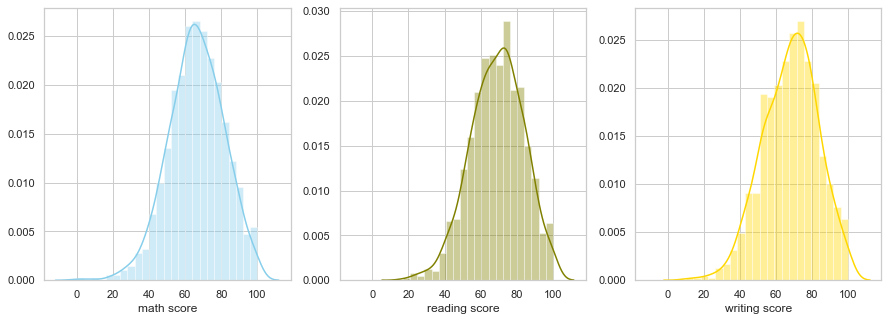

In [109]:
#Gender analysis
print("Test results described:")
print(df.describe())
print()
print("Test results of male students:")
print(df[df.gender == 'male'].describe())
print()
print("Test results of female students:")
print(df[df.gender == 'female'].describe())
print()

female_df = df["gender"] == "female"
female_math = df[female_df]['math score']
male_df = df['gender'] == 'male'
male_math = df[male_df]['math score']
(t, p) = ttest_ind(female_math, male_math)
print("Male math scores are significantly higher than female, with P-Value for the measurement: "+str(p))
print()

female_wr = df[female_df]['writing score']
male_wr = df[male_df]['writing score']
(t, p) = ttest_ind(female_wr, male_wr)
print("Female writing scores are significantly higher than male, with P-Value for the measurement: "+str(p))
print()

female_rd = df[female_df]['reading score']
male_rd = df[male_df]['reading score']
(t, p) = ttest_ind(female_rd, male_rd)
print("Female reading scores are significantly higher than male, with P-Value for the measurement: "+str(p))
print()

print("Plotted test results")
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.distplot( df["math score"] , color="skyblue", ax=axes[0])
sns.distplot( df["reading score"] , color="olive", ax=axes[1])
sns.distplot( df["writing score"] , color="gold", ax=axes[2])

Multiple regressions analysis by gender and test results:
Pearson R value for correlation between math score and reading score is: 0.81758 with a p-value of: 1.78775e-241

Pearson R value for correlation between math score and writing score is: 0.80264 with a p-value of: 3.37603e-226

Pearson R value for correlation between writing score and reading score is: 0.95460 with a p-value of: 0.00000e+00

There is strong correlation between different subjects test results. It means that students tend to know every subject at the same level and tend to get similar marks for different subjects


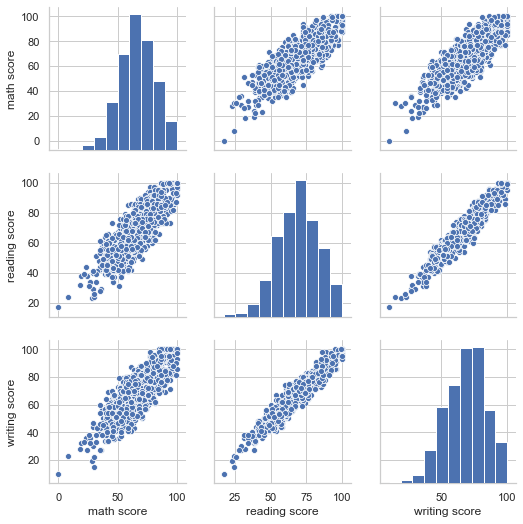

In [110]:
#Correlation between subjects
print("Multiple regressions analysis by gender and test results:")
sns.pairplot(df,  vars=["math score", "reading score", "writing score"])


(r, p) = pearsonr(df["math score"], df["reading score"])
print("Pearson R value for correlation between math score and reading score is: %.5f"%r + " with a p-value of: %.5e"%p)
print()
(r, p) = pearsonr(df["math score"], df["writing score"])
print("Pearson R value for correlation between math score and writing score is: %.5f"%r + " with a p-value of: %.5e"%p)
print()
(r, p) = pearsonr(df["writing score"], df["reading score"])
print("Pearson R value for correlation between writing score and reading score is: %.5f"%r + " with a p-value of: %.5e"%p)
print()


print("There is strong correlation between different subjects test results. It means that students tend to know every subject at the same level and tend to get similar marks for different subjects")

It seems that there is some difference between ethnical groups based on test results. Let's see if it is significant. 

ANOVA Statistic for math test results 14.593885166332637 and p-value 1.3732194030370688e-11
ANOVA Statistic for writing test results 7.162415174347504 and p-value 1.0979189070067382e-05
ANOVA Statistic for reading test results 5.621659307419644 and p-value 0.0001780089103235947

As the pvalues are less than 0.05 the differencies between ethnical groups based on test results are significant.


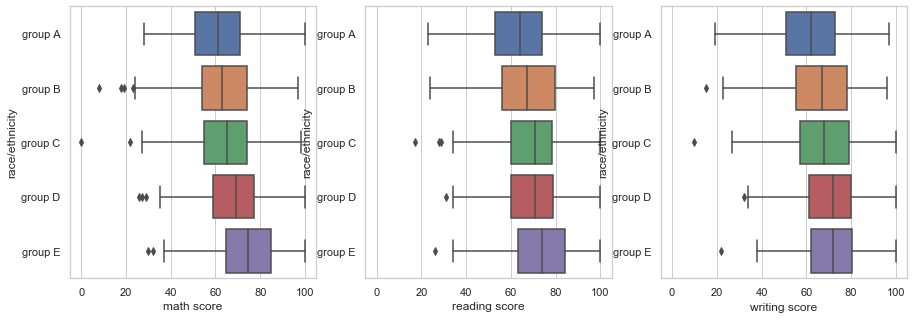

In [111]:
#Ethnical group analysis
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
ax = sns.boxplot(x="math score", y="race/ethnicity", data=df, ax=axes[0])
ax = sns.boxplot(x="reading score", y="race/ethnicity", data=df, ax=axes[1])
ax = sns.boxplot(x="writing score", y="race/ethnicity", data=df, ax=axes[2])
print("It seems that there is some difference between ethnical groups based on test results. Let's see if it is significant. ")
print()

A_df = df["race/ethnicity"] == "group A"
B_df = df["race/ethnicity"] == "group B"
C_df = df["race/ethnicity"] == "group C"
D_df = df["race/ethnicity"] == "group D"
E_df = df["race/ethnicity"] == "group E"

A_math = df[A_df]['math score']
B_math = df[B_df]['math score']
C_math = df[C_df]['math score']
D_math = df[D_df]['math score']
E_math = df[E_df]['math score']

A_writing = df[A_df]['writing score']
B_writing = df[B_df]['writing score']
C_writing = df[C_df]['writing score']
D_writing = df[D_df]['writing score']
E_writing = df[E_df]['writing score']

A_reading = df[A_df]['reading score']
B_reading = df[B_df]['reading score']
C_reading = df[C_df]['reading score']
D_reading = df[D_df]['reading score']
E_reading = df[E_df]['reading score']

import scipy.stats as stats
F, p = stats.f_oneway(A_math, B_math, C_math, D_math, E_math)
print("ANOVA Statistic for math test results " + str(F) + " and p-value " + str(p))
F, p = stats.f_oneway(A_writing, B_writing, C_writing, D_writing, E_writing)
print("ANOVA Statistic for writing test results " + str(F) + " and p-value " + str(p))
F, p = stats.f_oneway(A_reading, B_reading, C_reading, D_reading, E_reading)
print("ANOVA Statistic for reading test results " + str(F) + " and p-value " + str(p))
print()
print("As the pvalues are less than 0.05 the differencies between ethnical groups based on test results are significant.")



gender race/ethnicity parental level of education         lunch  \
778  female        group A                           3      standard   
546  female        group A                           1      standard   
820  female        group A                           1      standard   
741  female        group A                           4  free/reduced   
305    male        group A                           3      standard   

    test preparation course  math score  reading score  writing score  
778               completed          72             79             82  
546               completed          92            100             97  
820               completed          85             90             92  
741                    none          37             57             56  
305                    none          69             67             69  
It seems that there is some difference between parental level of education based on test results. Let's see if it is significant. 

ANOVA St

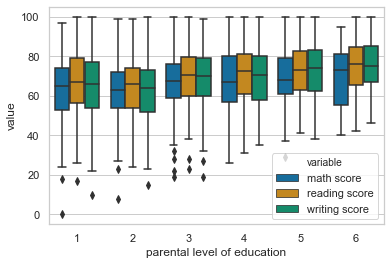

In [112]:
#Parental level of education analysis


print(df.head())
ploe_df = pd.melt(df, id_vars=['parental level of education'], value_vars=['math score', 'reading score', 'writing score'])

sns.boxplot(y='value', x='parental level of education', 
                 data = ploe_df, 
                 palette="colorblind",
                 hue='variable')

print("It seems that there is some difference between parental level of education based on test results. Let's see if it is significant. ")
print()

A_df = df["parental level of education"] == "1"
B_df = df["parental level of education"] == "2"
C_df = df["parental level of education"] == "3"
D_df = df["parental level of education"] == "4"
E_df = df["parental level of education"] == "5"

A_math = df[A_df]['math score']
B_math = df[B_df]['math score']
C_math = df[C_df]['math score']
D_math = df[D_df]['math score']
E_math = df[E_df]['math score']

A_writing = df[A_df]['writing score']
B_writing = df[B_df]['writing score']
C_writing = df[C_df]['writing score']
D_writing = df[D_df]['writing score']
E_writing = df[E_df]['writing score']

A_reading = df[A_df]['reading score']
B_reading = df[B_df]['reading score']
C_reading = df[C_df]['reading score']
D_reading = df[D_df]['reading score']
E_reading = df[E_df]['reading score']

import scipy.stats as stats
F, p = stats.f_oneway(A_math, B_math, C_math, D_math, E_math)
print("ANOVA Statistic for math test results " + str(F) + " and p-value " + str(p))
F, p = stats.f_oneway(A_writing, B_writing, C_writing, D_writing, E_writing)
print("ANOVA Statistic for writing test results " + str(F) + " and p-value " + str(p))
F, p = stats.f_oneway(A_reading, B_reading, C_reading, D_reading, E_reading)
print("ANOVA Statistic for reading test results " + str(F) + " and p-value " + str(p))
print()
print("There is significant difference between parental level of education and students' test performance.")


Students' who eat standard lunch math test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: 2.4131955993137074e-30

Students' who eat standard lunch reading test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: 2.0027966545279011e-13

Students' who eat standard lunch writing test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: 3.186189583166408e-15



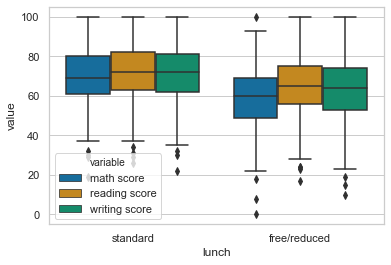

In [113]:
#lunch analysis

st_df = df["lunch"] == "standard"
st_math = df[st_df]['math score']
st_reading = df[st_df]['reading score']
st_writing = df[st_df]['writing score']

free_df = df["lunch"] == "free/reduced"
free_math = df[free_df]['math score']
free_reading = df[free_df]['reading score']
free_writing = df[free_df]['writing score']

(t, p) = ttest_ind(st_math, free_math)
print("Students' who eat standard lunch math test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: "+str(p))
print()
(t, p) = ttest_ind(st_reading, free_reading)
print("Students' who eat standard lunch reading test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: "+str(p))
print()
(t, p) = ttest_ind(st_writing, free_writing)
print("Students' who eat standard lunch writing test grades signifficantly differ from students' who eat free/reduced lunch with P-Value for the measurement: "+str(p))
print()

lunch_df = pd.melt(df, id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score'])

sns.boxplot(y='value', x='lunch', 
                 data = lunch_df, 
                 palette="colorblind",
                 hue='variable')




Students' who did test preparation course math test grades signifficantly differ from students' who did not with P-Value for the measurement: 1.5359134607147415e-08

Students' who did test preparation course reading test grades signifficantly differ from students' who did not with P-Value for the measurement: 9.081783336892205e-15

Students' who did test preparation course writing test grades signifficantly differ from students' who did not with P-Value for the measurement: 3.68529173524572e-24



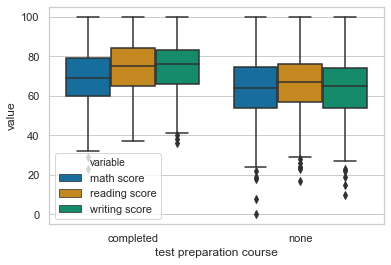

In [114]:
#preparation test analysis

cp_df = df["test preparation course"] == "completed"
cp_math = df[cp_df]['math score']
cp_reading = df[cp_df]['reading score']
cp_writing = df[cp_df]['writing score']

none_df = df["test preparation course"] == "none"
none_math = df[none_df]['math score']
none_reading = df[none_df]['reading score']
none_writing = df[none_df]['writing score']

(t, p) = ttest_ind(cp_math, none_math)
print("Students' who did test preparation course math test grades signifficantly differ from students' who did not with P-Value for the measurement: "+str(p))
print()
(t, p) = ttest_ind(cp_reading, none_reading)
print("Students' who did test preparation course reading test grades signifficantly differ from students' who did not with P-Value for the measurement: "+str(p))
print()
(t, p) = ttest_ind(cp_writing, none_writing)
print("Students' who did test preparation course writing test grades signifficantly differ from students' who did not with P-Value for the measurement: "+str(p))
print()

test_df = pd.melt(df, id_vars=['test preparation course'], value_vars=['math score', 'reading score', 'writing score'])

sns.boxplot(y='value', x='test preparation course', 
                 data = test_df, 
                 palette="colorblind",
                 hue='variable')



Finally, I'd like to analyse the effect of contributing factors to the test results. I will assign contributing factors as 1 and not contributing factors as 0 i. e., for lunch factor: standard = 1, free/reduced = 0 and so on. For race and parental level of education values between 0 and 1 will be used. Additionaly, I will calculate the sum of these factors and plot it against the sum of test results:

In [115]:
cf_df= df


cf_df['race/ethnicity'].replace(['group A'], value=0.2, inplace=True)
cf_df['race/ethnicity'].replace(['group B'], value =0.4, inplace=True)
cf_df['race/ethnicity'].replace(['group C'], value =0.6, inplace=True)
cf_df['race/ethnicity'].replace(['group D'], value =0.8, inplace=True)
cf_df['race/ethnicity'].replace(['group E'], value =1, inplace=True)

cf_df['parental level of education'].replace(['1'], value =0, inplace=True)
cf_df['parental level of education'].replace(['2'], value =0.2, inplace=True)
cf_df['parental level of education'].replace(['3'], value =0.4, inplace=True)
cf_df['parental level of education'].replace(['4'], value =0.6, inplace=True)
cf_df['parental level of education'].replace(['5'], value =0.8, inplace=True)
cf_df['parental level of education'].replace(['6'], value =1, inplace=True)

cf_df['lunch'].replace(['free/reduced'], value =0, inplace=True)
cf_df['lunch'].replace(['standard'], value =1, inplace=True)

cf_df['test preparation course'].replace(['none'], value =0, inplace=True)
cf_df['test preparation course'].replace(['completed'], value =1, inplace=True)

cf_df["contributing_factors_sum"]=0
print(cf_df.head()) 
cf_df["contributing_factors_sum"]=cf_df['race/ethnicity']+cf_df['parental level of education']+cf_df['lunch']+cf_df['test preparation course']

cf_df["test_sum"]=cf_df["reading score"]+cf_df["writing score"]+cf_df["math score"]

print("Let's look at the data converted to numerical units:")
print()
print(cf_df.head()) 
print()


gender  race/ethnicity  parental level of education  lunch  \
778  female             0.2                          0.4      1   
546  female             0.2                          0.0      1   
820  female             0.2                          0.0      1   
741  female             0.2                          0.6      0   
305    male             0.2                          0.4      1   

     test preparation course  math score  reading score  writing score  \
778                        1          72             79             82   
546                        1          92            100             97   
820                        1          85             90             92   
741                        0          37             57             56   
305                        0          69             67             69   

     contributing_factors_sum  
778                         0  
546                         0  
820                         0  
741                         0

Factors like standard lunch, completion of test preparation course, higher parental level of education correlates with test results. This graph show that the more contributing factors student has the more likely he is to get better test results. 

Calculate Pearson R and p-values for the contributing_factors_sum and test_sum columns:
Pearson R value is: 0.46767 with a p-value of: 1.74398e-55


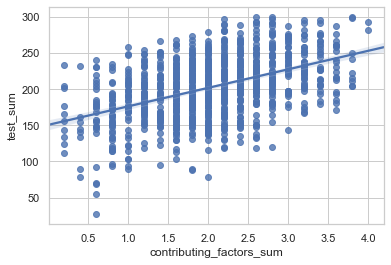

In [118]:
print("Calculate Pearson R and p-values for the contributing_factors_sum and test_sum columns:")
(r, p) = pearsonr(cf_df["contributing_factors_sum"], cf_df["test_sum"])
print("Pearson R value is: %.5f"%r + " with a p-value of: %.5e"%p)
sns.regplot(x="contributing_factors_sum", y="test_sum", data=cf_df)